In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

PRICES_PATH = Path("stock_prices.csv")
NEWS_PATH   = Path("news.csv")

In [ ]:
prices = pd.read_csv(PRICES_PATH, low_memory=False)
news   = pd.read_csv(NEWS_PATH,   low_memory=False)

print("prices shape:", prices.shape)
print("news shape  :", news.shape)

prices shape: (380, 17)
news shape  : (889, 19)


In [ ]:
prices.head()

,ticker,date,open,high,low,close,volume,asset_type,price_currency,daily_change,daily_return,volatility,avg_price,turnover,gap,range_ratio,ingested_at
0,AAPL,2025-10-01,255.04,258.79,254.95,255.45,45889562,Stock,USD,0.41,0.1608,3.84,256.40,1.172249e+10,1.51,1.5056,2025-10-24 03:18:58.515483+00:00
1,AMZN,2025-10-01,217.26,222.15,216.61,220.63,40158363,Stock,USD,3.37,1.5511,5.54,219.80,8.860140e+09,2.55,2.5499,2025-10-24 03:18:58.515483+00:00
2,GOOG,2025-10-01,241.18,247.15,239.20,245.54,23947580,ETF,EUR,4.36,1.8078,7.95,243.96,5.880089e+09,3.30,3.2963,2025-10-24 03:18:58.515483+00:00
3,MSFT,2025-10-01,514.80,520.51,511.69,519.71,22414115,Stock,USD,4.91,0.9538,8.81,517.30,1.164884e+10,1.71,1.7123,2025-10-24 03:18:58.515483+00:00
4,TSLA,2025-10-01,443.74,462.29,440.76,459.46,97116635,Stock,USD,15.72,3.5426,21.53,454.17,4.462121e+10,4.85,4.8519,2025-10-24 03:18:58.515483+00:00


In [ ]:
news.head()

,uuid,title,description,url,image_url,language,source,relevance_score,symbol,country,type,industry,match_score,sentiment_score,sentiment_label,impact_index,weighted_sentiment,published_at,ingested_at
0,8566698d-acb4-4a28-9bcd-8345c23891ef,"Fermi AI energy start-up soars on Nasdaq, plan...","Fermi AI Energy IPO, co-founded by Rick Perry,...",https://economictimes.indiatimes.com/news/inte...,"https://img.etimg.com/thumb/msid-124265821,wid...",en,economictimes.indiatimes.com,NaN,MSFT,us,equity,Technology,24.850998,0.5574,Positive,1385.1946,13.8519,2025-10-01 19:51:08+00:00,2025-10-24 03:19:01.826259+00:00
1,60840ff5-c847-4755-a290-01d35c3b8682,ASX Market Open: Three-day Wall Street rally t...,ASX today – Australian shares are heading towa...,https://themarketonline.com.au/asx-market-open...,https://themarketonline.com.au/wp-content/uplo...,en,themarketherald.com.au,NaN,AAPL,us,equity,Technology,8.875149,0.1531,Neutral,135.8785,1.3588,2025-10-01 22:41:01+00:00,2025-10-24 03:19:03.727341+00:00
2,a9db4aa9-a1f8-431b-9974-4421f053ff64,Apple tables Vision Pro sequel to pursue smart...,Apple (AAPL) has tabled its efforts to produce...,https://seekingalpha.com/news/4501148-apple-ta...,https://static.seekingalpha.com/cdn/s3/uploads...,en,seekingalpha.com,NaN,AAPL,us,equity,Technology,32.602245,0.7155,Positive,2332.6906,23.3269,2025-10-01 22:06:47+00:00,2025-10-24 03:19:03.727341+00:00
3,16c38c14-e8f3-454a-b763-77b3882e1ddc,"Amazon.com, Inc. (AMZN) Agrees to Pay $2.5 Bil...","Amazon.com, Inc.",https://www.insidermonkey.com/blog/amazon-com-...,https://d2gr5kl7dt2z3t.cloudfront.net/blog/wp-...,en,insidermonkey.com,NaN,AMZN,us,equity,Consumer Cyclical,56.206364,0.4588,Neutral,2578.7480,25.7875,2025-10-01 21:30:51+00:00,2025-10-24 03:19:05.133454+00:00
4,7f8185aa-9bfe-49e8-8ad9-6565d18ea6f9,AYA fundamental analysis of Amazon ($AMZN),“” is published by Brass Ring International De...,https://medium.com/@brassring2020/aya-fundamen...,https://miro.medium.com/v2/da:true/bc1f8416df0...,en,medium.com,NaN,AMZN,us,equity,Consumer Cyclical,10.525839,0.3771,Neutral,396.9294,3.9693,2025-10-01 16:10:28+00:00,2025-10-24 03:19:05.133454+00:00


In [ ]:
column_prices = [
    "ticker", "date",
    "open", "high", "low", "close",
    "volume",
    "daily_return", "avg_price",
    "volatility", "turnover", "gap", "range_ratio"
]

column_news = [
    "symbol", "published_at","industry",
    "match_score", "sentiment_score", "impact_index", "weighted_sentiment"
]

In [ ]:
prices_keep = [c for c in column_prices if c in prices.columns]
news_keep   = [c for c in column_news   if c in news.columns]

In [ ]:
prices = prices[prices_keep].copy()
news = news[news_keep].copy()

In [ ]:
prices.head()

,ticker,date,open,high,low,close,volume,daily_return,avg_price,volatility,turnover,gap,range_ratio
0,AAPL,2025-10-01,255.04,258.79,254.95,255.45,45889562,0.1608,256.40,3.84,1.172249e+10,1.51,1.5056
1,AMZN,2025-10-01,217.26,222.15,216.61,220.63,40158363,1.5511,219.80,5.54,8.860140e+09,2.55,2.5499
2,GOOG,2025-10-01,241.18,247.15,239.20,245.54,23947580,1.8078,243.96,7.95,5.880089e+09,3.30,3.2963
3,MSFT,2025-10-01,514.80,520.51,511.69,519.71,22414115,0.9538,517.30,8.81,1.164884e+10,1.71,1.7123
4,TSLA,2025-10-01,443.74,462.29,440.76,459.46,97116635,3.5426,454.17,21.53,4.462121e+10,4.85,4.8519


In [ ]:
news.head()

,symbol,published_at,industry,match_score,sentiment_score,impact_index,weighted_sentiment
0,MSFT,2025-10-01 19:51:08+00:00,Technology,24.850998,0.5574,1385.1946,13.8519
1,AAPL,2025-10-01 22:41:01+00:00,Technology,8.875149,0.1531,135.8785,1.3588
2,AAPL,2025-10-01 22:06:47+00:00,Technology,32.602245,0.7155,2332.6906,23.3269
3,AMZN,2025-10-01 21:30:51+00:00,Consumer Cyclical,56.206364,0.4588,2578.7480,25.7875
4,AMZN,2025-10-01 16:10:28+00:00,Consumer Cyclical,10.525839,0.3771,396.9294,3.9693


## news

In [ ]:
news["published_at"] = pd.to_datetime(news["published_at"], errors="coerce", utc=True)
news["date_only"] = news["published_at"].dt.date

In [ ]:
# 4) Dồn tin cuối tuần về thứ 2 (trade_date)
news["date_only"] = pd.to_datetime(news["date_only"])
def shift_weekend_to_monday(d):
    if pd.isna(d):
        return d
    wd = d.weekday()   # Mon=0 ... Sun=6
    if wd == 5:        # Sat -> +2
        return d + pd.Timedelta(days=2)
    if wd == 6:        # Sun -> +1
        return d + pd.Timedelta(days=1)
    return d

news["trade_date"] = news["date_only"].apply(shift_weekend_to_monday)

In [ ]:
news

,symbol,published_at,industry,match_score,sentiment_score,impact_index,weighted_sentiment,date_only,trade_date
0,MSFT,2025-10-01 19:51:08+00:00,Technology,24.850998,0.5574,1385.1946,13.8519,2025-10-01,2025-10-01
1,AAPL,2025-10-01 22:41:01+00:00,Technology,8.875149,0.1531,135.8785,1.3588,2025-10-01,2025-10-01
2,AAPL,2025-10-01 22:06:47+00:00,Technology,32.602245,0.7155,2332.6906,23.3269,2025-10-01,2025-10-01
3,AMZN,2025-10-01 21:30:51+00:00,Consumer Cyclical,56.206364,0.4588,2578.7480,25.7875,2025-10-01,2025-10-01
4,AMZN,2025-10-01 16:10:28+00:00,Consumer Cyclical,10.525839,0.3771,396.9294,3.9693,2025-10-01,2025-10-01
...,...,...,...,...,...,...,...,...,...
884,AMZN,2025-07-14 22:00:15+00:00,Consumer Cyclical,5.711829,0.4588,262.0587,2.6206,2025-07-14,2025-07-14
885,GOOG,2025-07-14 20:00:17+00:00,Communication Services,18.051947,0.1361,245.6870,2.4569,2025-07-14,2025-07-14
886,GOOG,2025-07-14 20:00:02+00:00,Communication Services,9.345621,0.3400,317.7511,3.1775,2025-07-14,2025-07-14
887,TSLA,2025-07-14 20:38:27+00:00,Consumer Cyclical,13.238867,0.3404,450.6510,4.5065,2025-07-14,2025-07-14


In [ ]:
# 2) Hàm phụ đơn giản: có mâu thuẫn dấu sentiment trong ngày không?
def sign_conflict(vals):
    vals = [v for v in vals if pd.notna(v)]
    if len(vals) < 2:
        return 0.0
    return float((min(vals) < 0) and (max(vals) > 0))  # 1.0 nếu có tin âm và dương, ngược lại 0.0

In [ ]:
news.columns

Index(['symbol', 'published_at', 'industry', 'match_score', 'sentiment_score',
       'impact_index', 'weighted_sentiment', 'date_only', 'trade_date'],
      dtype='object')

In [ ]:
# 3) Gộp theo (symbol, trade_date) và tính feature cơ bản
group_cols = ["symbol", "trade_date"]

agg = {
    "trade_date" : "count",
}

# sentiment cơ bản
if "sentiment_score" in news.columns:
    agg.update({
        "sentiment_score": ["mean", "max", "min"],
    })

# weighted_sentiment & impact & match_score (nếu có)
for col in ["weighted_sentiment", "impact_index", "match_score"]:
    if col in news.columns:
        agg[col] = ["mean", "max"]

In [ ]:
agg

{'trade_date': 'count',
 'sentiment_score': ['mean', 'max', 'min'],
 'weighted_sentiment': ['mean', 'max'],
 'impact_index': ['mean', 'max'],
 'match_score': ['mean', 'max']}

In [ ]:
# thực hiện groupby + agg
news_daily = (
    news.groupby(group_cols)
        .agg(agg))

In [ ]:
news_daily.columns

MultiIndex([(        'trade_date', 'count'),
            (   'sentiment_score',  'mean'),
            (   'sentiment_score',   'max'),
            (   'sentiment_score',   'min'),
            ('weighted_sentiment',  'mean'),
            ('weighted_sentiment',   'max'),
            (      'impact_index',  'mean'),
            (      'impact_index',   'max'),
            (       'match_score',  'mean'),
            (       'match_score',   'max')],
           )

In [ ]:
# Bỏ multiindex cột (flatten)
news_daily.columns = [
    f"{col}_{stat}" if stat != "" else col
    for col, stat in news_daily.columns
]
news_daily = news_daily.reset_index()

In [ ]:
# Đổi tên cột cho gọn và dễ hiểu
rename_map = {
    "trade_date_count": "news_count",
    "sentiment_score_mean": "sent_mean",
    "sentiment_score_max": "sent_max",
    "sentiment_score_min": "sent_min",
    "weighted_sentiment_mean": "weighted_sent_mean",
    "weighted_sentiment_max": "weighted_sent_max",
    "impact_index_mean": "impact_mean",
    "impact_index_max": "impact_max",
    "match_score_mean": "match_mean",
    "match_score_max": "match_max",
}
news_daily = news_daily.rename(columns=rename_map)

In [ ]:
# 2 feature dễ hiểu thêm:
news_daily["sent_range"] = news_daily["sent_max"] - news_daily["sent_min"]
news_daily["sent_sign_conflict"] = (news_daily["sent_min"] < 0) & (news_daily["sent_max"] > 0)
news_daily["sent_sign_conflict"] = news_daily["sent_sign_conflict"].astype(int)

In [ ]:
news_daily

,symbol,trade_date,news_count,sent_mean,sent_max,sent_min,weighted_sent_mean,weighted_sent_max,impact_mean,impact_max,match_mean,match_max,sent_range,sent_sign_conflict
0,AAPL,2025-06-30,1,0.670500,0.6705,0.6705,6.403900,6.4039,640.389300,640.3893,9.550922,9.550922,0.0000,0
1,AAPL,2025-07-02,2,0.180600,0.3612,0.0000,1.776200,3.5524,177.621550,355.2431,9.570165,9.835080,0.3612,0
2,AAPL,2025-07-03,2,0.323950,0.4456,0.2023,6.801050,11.6692,680.106600,1166.9235,17.872119,26.189630,0.2433,0
3,AAPL,2025-07-04,2,0.306100,0.3336,0.2786,10.262550,15.6433,1026.258950,1564.3331,35.391801,56.147570,0.0550,0
4,AAPL,2025-07-07,4,-0.071725,0.4019,-0.3313,7.707600,24.1362,770.758125,2413.6150,24.762066,72.860110,0.7332,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,TSLA,2025-11-03,6,0.226733,0.4051,0.0000,4.527917,7.2594,452.790467,725.9397,25.706345,52.319977,0.4051,0
382,TSLA,2025-11-04,2,0.115350,0.5267,-0.2960,4.517500,4.7752,451.750900,477.5233,12.110117,16.132545,0.8227,1
383,TSLA,2025-11-05,2,0.103050,0.2249,-0.0188,1.804150,2.9308,180.414900,293.0773,24.584222,36.134678,0.2437,1
384,TSLA,2025-11-06,2,0.203750,0.3167,0.0908,7.059950,8.6290,705.996000,862.8997,43.875889,60.506042,0.2259,0


In [ ]:
news_daily.shape

(386, 14)

In [ ]:
news_daily = news_daily.rename(columns={"symbol": "ticker"})

In [ ]:
news_daily = news_daily.rename(columns={"trade_date": "date_only"})

In [ ]:
news_daily.head()

,ticker,date_only,news_count,sent_mean,sent_max,sent_min,weighted_sent_mean,weighted_sent_max,impact_mean,impact_max,match_mean,match_max,sent_range,sent_sign_conflict
0,AAPL,2025-06-30,1,0.670500,0.6705,0.6705,6.40390,6.4039,640.389300,640.3893,9.550922,9.550922,0.0000,0
1,AAPL,2025-07-02,2,0.180600,0.3612,0.0000,1.77620,3.5524,177.621550,355.2431,9.570165,9.835080,0.3612,0
2,AAPL,2025-07-03,2,0.323950,0.4456,0.2023,6.80105,11.6692,680.106600,1166.9235,17.872119,26.189630,0.2433,0
3,AAPL,2025-07-04,2,0.306100,0.3336,0.2786,10.26255,15.6433,1026.258950,1564.3331,35.391801,56.147570,0.0550,0
4,AAPL,2025-07-07,4,-0.071725,0.4019,-0.3313,7.70760,24.1362,770.758125,2413.6150,24.762066,72.860110,0.7332,1


## prices

In [ ]:
prices["date"] = pd.to_datetime(prices["date"], errors="coerce")
prices["date_only"] = prices["date"].dt.date

In [ ]:
# 2) Ép kiểu số cho các cột numeric (an toàn khi có chuỗi/NaN)
num_cols = [
    "open","high","low","close","volume",
    "daily_return","avg_price","volatility","turnover","gap","range_ratio"
]
for c in [c for c in num_cols if c in prices.columns]:
    prices[c] = pd.to_numeric(prices[c], errors="coerce")

In [ ]:
prices

,ticker,date,open,high,low,close,volume,daily_return,avg_price,volatility,turnover,gap,range_ratio,date_only
0,AAPL,2025-10-01,255.04,258.79,254.95,255.45,45889562,0.1608,256.40,3.84,1.172249e+10,1.51,1.5056,2025-10-01
1,AMZN,2025-10-01,217.26,222.15,216.61,220.63,40158363,1.5511,219.80,5.54,8.860140e+09,2.55,2.5499,2025-10-01
2,GOOG,2025-10-01,241.18,247.15,239.20,245.54,23947580,1.8078,243.96,7.95,5.880089e+09,3.30,3.2963,2025-10-01
3,MSFT,2025-10-01,514.80,520.51,511.69,519.71,22414115,0.9538,517.30,8.81,1.164884e+10,1.71,1.7123,2025-10-01
4,TSLA,2025-10-01,443.74,462.29,440.76,459.46,97116635,3.5426,454.17,21.53,4.462121e+10,4.85,4.8519,2025-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,AAPL,2025-07-11,210.57,212.13,209.86,211.16,39719300,0.2802,211.05,2.27,8.387127e+09,1.08,1.0780,2025-07-11
376,AMZN,2025-07-11,223.58,226.68,222.37,225.02,50518307,0.6441,224.69,4.31,1.136763e+10,1.93,1.9277,2025-07-11
377,GOOG,2025-07-11,177.91,182.61,177.54,181.31,23953300,1.9111,180.49,5.07,4.342973e+09,2.85,2.8492,2025-07-11
378,MSFT,2025-07-11,498.47,505.03,497.80,503.32,16455000,0.9730,502.05,7.23,8.282131e+09,1.45,1.4504,2025-07-11


In [ ]:
# 3) Bỏ bản ghi trùng (ticker, date_only) – giữ dòng cuối cùng (giả định mới nhất)
prices = (
    prices
    .sort_values(["ticker","date_only","date"])   # nếu cùng ngày có nhiều dòng, lấy dòng muộn hơn
    .drop_duplicates(subset=["ticker","date_only"], keep="last")
    .reset_index(drop=True)
)

In [ ]:
prices

,ticker,date,open,high,low,close,volume,daily_return,avg_price,volatility,turnover,gap,range_ratio,date_only
0,AAPL,2025-06-30,202.01,207.39,199.26,205.17,90651078,1.5643,203.94,8.13,1.859888e+10,4.02,4.0242,2025-06-30
1,AAPL,2025-07-01,206.67,210.19,206.14,207.82,77921627,0.5589,208.05,4.05,1.619367e+10,1.96,1.9580,2025-07-01
2,AAPL,2025-07-02,209.08,213.34,208.14,212.44,67834447,1.6070,211.31,5.20,1.441075e+10,2.49,2.4871,2025-07-02
3,AAPL,2025-07-03,212.15,214.65,211.81,213.55,34955836,0.6623,213.34,2.84,7.464819e+09,1.34,1.3387,2025-07-03
4,AAPL,2025-07-07,212.68,216.23,208.80,209.95,49905104,-1.2836,211.66,7.43,1.047758e+10,3.49,3.4935,2025-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,TSLA,2025-11-03,455.99,474.07,453.80,468.37,84122035,2.7150,465.41,20.27,3.940024e+10,4.45,4.4453,2025-11-03
376,TSLA,2025-11-04,454.37,460.22,443.80,444.26,86362980,-2.2251,449.43,16.42,3.836762e+10,3.61,3.6138,2025-11-04
377,TSLA,2025-11-05,451.92,466.33,440.71,462.07,84761112,2.2460,456.37,25.62,3.916557e+10,5.67,5.6691,2025-11-05
378,TSLA,2025-11-06,461.96,467.45,435.09,445.91,104867157,-3.4743,449.48,32.36,4.676131e+10,7.00,7.0049,2025-11-06


In [ ]:
# 4) Sắp xếp chuẩn theo (ticker, date_only)
prices = prices.sort_values(["ticker","date_only"]).reset_index(drop=True)

# 5) (Tuỳ chọn) kiểm tra nhanh tính hợp lệ OHLC – chỉ log, chưa sửa dữ liệu
if set(["open","high","low","close"]).issubset(prices.columns):
    bad_ohlc = prices[(prices["high"] < prices["low"]) |
                      (prices["open"] > prices["high"]) |
                      (prices["close"] > prices["high"]) |
                      (prices["open"] < prices["low"])  |
                      (prices["close"] < prices["low"])]
    print(f"[check] OHLC inconsistencies: {len(bad_ohlc)} rows")

[check] OHLC inconsistencies: 0 rows


In [ ]:
# 6) Xem vài dòng để xác nhận
print(prices.head())
print("prices shape:", prices.shape)

  ticker       date    open    high     low   close    volume  daily_return  \
0   AAPL 2025-06-30  202.01  207.39  199.26  205.17  90651078        1.5643   
1   AAPL 2025-07-01  206.67  210.19  206.14  207.82  77921627        0.5589   
2   AAPL 2025-07-02  209.08  213.34  208.14  212.44  67834447        1.6070   
3   AAPL 2025-07-03  212.15  214.65  211.81  213.55  34955836        0.6623   
4   AAPL 2025-07-07  212.68  216.23  208.80  209.95  49905104       -1.2836   

   avg_price  volatility      turnover   gap  range_ratio   date_only  
0     203.94        8.13  1.859888e+10  4.02       4.0242  2025-06-30  
1     208.05        4.05  1.619367e+10  1.96       1.9580  2025-07-01  
2     211.31        5.20  1.441075e+10  2.49       2.4871  2025-07-02  
3     213.34        2.84  7.464819e+09  1.34       1.3387  2025-07-03  
4     211.66        7.43  1.047758e+10  3.49       3.4935  2025-07-07  
prices shape: (380, 14)


In [ ]:
prices_daily = prices[[c for c in prices.columns if c!= 'date']]

In [ ]:
prices_daily['date_only'] = pd.to_datetime(prices_daily["date_only"])

/tmp/ipython-input-1254076149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_daily['date_only'] = pd.to_datetime(prices_daily["date_only"])


In [ ]:
prices_daily.head()

,ticker,open,high,low,close,volume,daily_return,avg_price,volatility,turnover,gap,range_ratio,date_only
0,AAPL,202.01,207.39,199.26,205.17,90651078,1.5643,203.94,8.13,1.859888e+10,4.02,4.0242,2025-06-30
1,AAPL,206.67,210.19,206.14,207.82,77921627,0.5589,208.05,4.05,1.619367e+10,1.96,1.9580,2025-07-01
2,AAPL,209.08,213.34,208.14,212.44,67834447,1.6070,211.31,5.20,1.441075e+10,2.49,2.4871,2025-07-02
3,AAPL,212.15,214.65,211.81,213.55,34955836,0.6623,213.34,2.84,7.464819e+09,1.34,1.3387,2025-07-03
4,AAPL,212.68,216.23,208.80,209.95,49905104,-1.2836,211.66,7.43,1.047758e+10,3.49,3.4935,2025-07-07


## join

In [ ]:
news_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ticker              386 non-null    object        
 1   date_only           386 non-null    datetime64[ns]
 2   news_count          386 non-null    int64         
 3   sent_mean           386 non-null    float64       
 4   sent_max            386 non-null    float64       
 5   sent_min            386 non-null    float64       
 6   weighted_sent_mean  386 non-null    float64       
 7   weighted_sent_max   386 non-null    float64       
 8   impact_mean         386 non-null    float64       
 9   impact_max          386 non-null    float64       
 10  match_mean          386 non-null    float64       
 11  match_max           386 non-null    float64       
 12  sent_range          386 non-null    float64       
 13  sent_sign_conflict  386 non-null    int64         

In [ ]:
prices_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ticker        380 non-null    object        
 1   open          380 non-null    float64       
 2   high          380 non-null    float64       
 3   low           380 non-null    float64       
 4   close         380 non-null    float64       
 5   volume        380 non-null    int64         
 6   daily_return  380 non-null    float64       
 7   avg_price     380 non-null    float64       
 8   volatility    380 non-null    float64       
 9   turnover      380 non-null    float64       
 10  gap           380 non-null    float64       
 11  range_ratio   380 non-null    float64       
 12  date_only     380 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 38.7+ KB


In [ ]:
# --- Join theo ticker và date_only ---
df = prices_daily.merge(news_daily, how="left", on=["ticker", "date_only"])

print("✅ Sau khi join:")
print("Shape:", df.shape)

✅ Sau khi join:
Shape: (380, 25)


In [ ]:
df.head()

,ticker,open,high,low,close,volume,daily_return,avg_price,volatility,turnover,...,sent_max,sent_min,weighted_sent_mean,weighted_sent_max,impact_mean,impact_max,match_mean,match_max,sent_range,sent_sign_conflict
0,AAPL,202.01,207.39,199.26,205.17,90651078,1.5643,203.94,8.13,1.859888e+10,...,0.6705,0.6705,6.40390,6.4039,640.389300,640.3893,9.550922,9.550922,0.0000,0.0
1,AAPL,206.67,210.19,206.14,207.82,77921627,0.5589,208.05,4.05,1.619367e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAPL,209.08,213.34,208.14,212.44,67834447,1.6070,211.31,5.20,1.441075e+10,...,0.3612,0.0000,1.77620,3.5524,177.621550,355.2431,9.570165,9.835080,0.3612,0.0
3,AAPL,212.15,214.65,211.81,213.55,34955836,0.6623,213.34,2.84,7.464819e+09,...,0.4456,0.2023,6.80105,11.6692,680.106600,1166.9235,17.872119,26.189630,0.2433,0.0
4,AAPL,212.68,216.23,208.80,209.95,49905104,-1.2836,211.66,7.43,1.047758e+10,...,0.4019,-0.3313,7.70760,24.1362,770.758125,2413.6150,24.762066,72.860110,0.7332,1.0


In [ ]:
df = df.sort_values(["ticker", "date_only"]).copy()

In [ ]:
# 1) Xác định các cột news numeric để ffill
news_num_cols = [
    "sent_mean", "sent_max", "sent_min", "sent_range", "sent_sign_conflict",
    "weighted_sent_mean", "weighted_sent_max",
    "impact_mean", "impact_max",
    "match_mean", "match_max"
]

In [ ]:
# Chỉ giữ những cột thật sự có trong df
news_num_cols = [c for c in news_num_cols if c in df.columns]

# 2) Convert về số để an toàn
for col in news_num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
df[news_num_cols] = df[news_num_cols].fillna(0)

In [ ]:
# 3) Fill NaN bằng giá trị của ngày trước (ffill theo từng ticker)
df[news_num_cols] = df.groupby("ticker")[news_num_cols].ffill()

In [ ]:
# 4) news_count: nếu ngày không có news thì để 0, KHÔNG ffill
if "news_count" in df.columns:
    df["news_count"] = df["news_count"].fillna(0).astype(int)

In [ ]:
df.head()

,ticker,open,high,low,close,volume,daily_return,avg_price,volatility,turnover,...,sent_max,sent_min,weighted_sent_mean,weighted_sent_max,impact_mean,impact_max,match_mean,match_max,sent_range,sent_sign_conflict
0,AAPL,202.01,207.39,199.26,205.17,90651078,1.5643,203.94,8.13,1.859888e+10,...,0.6705,0.6705,6.40390,6.4039,640.389300,640.3893,9.550922,9.550922,0.0000,0.0
1,AAPL,206.67,210.19,206.14,207.82,77921627,0.5589,208.05,4.05,1.619367e+10,...,0.0000,0.0000,0.00000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0
2,AAPL,209.08,213.34,208.14,212.44,67834447,1.6070,211.31,5.20,1.441075e+10,...,0.3612,0.0000,1.77620,3.5524,177.621550,355.2431,9.570165,9.835080,0.3612,0.0
3,AAPL,212.15,214.65,211.81,213.55,34955836,0.6623,213.34,2.84,7.464819e+09,...,0.4456,0.2023,6.80105,11.6692,680.106600,1166.9235,17.872119,26.189630,0.2433,0.0
4,AAPL,212.68,216.23,208.80,209.95,49905104,-1.2836,211.66,7.43,1.047758e+10,...,0.4019,-0.3313,7.70760,24.1362,770.758125,2413.6150,24.762066,72.860110,0.7332,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ticker              380 non-null    object        
 1   open                380 non-null    float64       
 2   high                380 non-null    float64       
 3   low                 380 non-null    float64       
 4   close               380 non-null    float64       
 5   volume              380 non-null    int64         
 6   daily_return        380 non-null    float64       
 7   avg_price           380 non-null    float64       
 8   volatility          380 non-null    float64       
 9   turnover            380 non-null    float64       
 10  gap                 380 non-null    float64       
 11  range_ratio         380 non-null    float64       
 12  date_only           380 non-null    datetime64[ns]
 13  news_count          380 non-null    int64         

In [ ]:
import pandas as pd
import numpy as np

def make_features(df, thr=0.005):
    """
    df: DataFrame hiện tại của bạn, với các cột:
        ['ticker','open','high','low','close','volume',
         'daily_return','avg_price','volatility','turnover','gap','range_ratio',
         'date_only',
         'news_count','sent_mean','sent_max','sent_min',
         'weighted_sent_mean','weighted_sent_max',
         'impact_mean','impact_max',
         'match_mean','match_max',
         'sent_range','sent_sign_conflict']
    thr: ngưỡng phân lớp target Up/Down (mặc định 0.5%).
    """
    df = df.copy()
    # Bảo đảm dạng datetime
    df["date_only"] = pd.to_datetime(df["date_only"])
    # Sắp xếp theo ticker + ngày
    df = df.sort_values(["ticker", "date_only"])

    # ===== 1. Làm sạch numeric cơ bản =====
    numeric_base_cols = [
        "open","high","low","close","volume",
        "daily_return","avg_price","volatility","turnover","gap","range_ratio",
        "news_count",
        "sent_mean","sent_max","sent_min","sent_range","sent_sign_conflict",
        "weighted_sent_mean","weighted_sent_max",
        "impact_mean","impact_max",
        "match_mean","match_max",
    ]
    for c in numeric_base_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    g = df.groupby("ticker")

    # ===== 2. PRICE FEATURES (ngắn hạn) =====
    # 2.1 Returns / momentum ngắn
    df["ret_1d"] = g["close"].pct_change(1)
    df["ret_3d"] = g["close"].pct_change(3)
    # (bỏ ret_5d, MA, volatility dài, ATR, RSI để tránh mất nhiều dòng)

    # ===== 3. NEWS FEATURES (ROLLING ngắn) =====
    if "sent_mean" in df.columns:
        df["sent_mean_3"] = g["sent_mean"].transform(
            lambda s: s.rolling(3, min_periods=1).mean()
        )
        # bỏ sent_mean_5
        df["sent_delta_1"] = g["sent_mean"].diff(1)
        # bỏ sent_delta_3

    if "impact_mean" in df.columns:
        df["impact_mean_3"] = g["impact_mean"].transform(
            lambda s: s.rolling(3, min_periods=1).mean()
        )
        # bỏ impact_mean_5

    if "news_count" in df.columns:
        df["news_count_3"] = g["news_count"].transform(
            lambda s: s.rolling(3, min_periods=1).sum()
        )
        # bỏ news_count_5

    # ===== 4. TIME-BASED FEATURES =====
    df["weekday"] = df["date_only"].dt.weekday       # 0=Mon,...,6=Sun
    df["month"]   = df["date_only"].dt.month
    df["is_month_start"] = df["date_only"].dt.is_month_start.astype(int)
    df["is_month_end"]   = df["date_only"].dt.is_month_end.astype(int)

    # ===== 5. TARGET: next-day return & nhãn 3 lớp =====
    df["close_next"] = g["close"].shift(-1)
    df["ret_next"] = (df["close_next"] - df["close"]) / df["close"]

    df["target"] = 0
    df.loc[df["ret_next"] >  thr, "target"] = 1
    df.loc[df["ret_next"] < -thr, "target"] = -1

    # loại dòng không có ngày tiếp theo (NaN ret_next)
    df = df.dropna(subset=["ret_next"]).reset_index(drop=True)

    # mã hoá target thành class 0/1/2 cho multi-class ML
    df["target_cls"] = df["target"].map({-1: 0, 0: 1, 1: 2})

    return df

In [ ]:
# df_raw là DataFrame 25 cột bạn đang có
df_feat = make_features(df, thr=0.005)

print(df_feat.shape)
print(df_feat[["ticker","date_only","close","ret_next","target","target_cls"]].head())

(375, 39)
  ticker  date_only   close  ret_next  target  target_cls
0   AAPL 2025-06-30  205.17  0.012916       1           2
1   AAPL 2025-07-01  207.82  0.022231       1           2
2   AAPL 2025-07-02  212.44  0.005225       1           2
3   AAPL 2025-07-03  213.55 -0.016858      -1           0
4   AAPL 2025-07-07  209.95  0.000286       0           1


In [ ]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ticker              375 non-null    object        
 1   open                375 non-null    float64       
 2   high                375 non-null    float64       
 3   low                 375 non-null    float64       
 4   close               375 non-null    float64       
 5   volume              375 non-null    int64         
 6   daily_return        375 non-null    float64       
 7   avg_price           375 non-null    float64       
 8   volatility          375 non-null    float64       
 9   turnover            375 non-null    float64       
 10  gap                 375 non-null    float64       
 11  range_ratio         375 non-null    float64       
 12  date_only           375 non-null    datetime64[ns]
 13  news_count          375 non-null    int64         

In [ ]:
df_feat

,ticker,open,high,low,close,volume,daily_return,avg_price,volatility,turnover,...,impact_mean_3,news_count_3,weekday,month,is_month_start,is_month_end,close_next,ret_next,target,target_cls
0,AAPL,202.01,207.39,199.26,205.17,90651078,1.5643,203.94,8.13,1.859888e+10,...,640.389300,1.0,0,6,0,1,207.82,0.012916,1,2
1,AAPL,206.67,210.19,206.14,207.82,77921627,0.5589,208.05,4.05,1.619367e+10,...,320.194650,1.0,1,7,1,0,212.44,0.022231,1,2
2,AAPL,209.08,213.34,208.14,212.44,67834447,1.6070,211.31,5.20,1.441075e+10,...,272.670283,3.0,2,7,0,0,213.55,0.005225,1,2
3,AAPL,212.15,214.65,211.81,213.55,34955836,0.6623,213.34,2.84,7.464819e+09,...,285.909383,4.0,3,7,0,0,209.95,-0.016858,-1,0
4,AAPL,212.68,216.23,208.80,209.95,49905104,-1.2836,211.66,7.43,1.047758e+10,...,542.828758,8.0,0,7,0,0,210.01,0.000286,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,TSLA,446.75,458.00,443.69,456.56,82980800,2.1959,452.75,14.31,3.788571e+10,...,1337.704483,6.0,4,10,0,1,468.37,0.025867,1,2
371,TSLA,455.99,474.07,453.80,468.37,84122035,2.7150,465.41,20.27,3.940024e+10,...,1351.650756,10.0,0,11,0,0,444.26,-0.051476,-1,0
372,TSLA,454.37,460.22,443.80,444.26,86362980,-2.2251,449.43,16.42,3.836762e+10,...,932.265306,10.0,1,11,0,0,462.07,0.040089,1,2
373,TSLA,451.92,466.33,440.71,462.07,84761112,2.2460,456.37,25.62,3.916557e+10,...,361.652089,10.0,2,11,0,0,445.91,-0.034973,-1,0


In [ ]:
drop_cols = ["ticker","date_only","close_next","ret_next","target","target_cls"]
feature_cols = [c for c in df_feat.columns if c not in drop_cols]

df_model = df_feat.dropna(subset=feature_cols).reset_index(drop=True)
X = df_model[feature_cols]
y = df_model["target_cls"]

In [ ]:
print(X.shape, y.shape)

(360, 33) (360,)


In [ ]:
X.head()

,open,high,low,close,volume,daily_return,avg_price,volatility,turnover,gap,...,ret_1d,ret_3d,sent_mean_3,sent_delta_1,impact_mean_3,news_count_3,weekday,month,is_month_start,is_month_end
0,212.15,214.65,211.81,213.55,34955836,0.6623,213.34,2.84,7.464819e+09,1.34,...,0.005225,0.040844,0.168183,0.143350,285.909383,4.0,3,7,0,0
1,212.68,216.23,208.80,209.95,49905104,-1.2836,211.66,7.43,1.047758e+10,3.49,...,-0.016858,0.010249,0.144275,-0.395675,542.828758,8.0,0,7,0,0
2,210.13,211.43,208.45,210.01,42036884,-0.0571,209.96,2.98,8.828166e+09,1.42,...,0.000286,-0.011439,0.202342,0.426525,596.686808,8.0,1,7,0,0
3,209.53,211.33,207.22,211.14,48408519,0.7684,209.90,4.11,1.022097e+10,1.96,...,0.005381,-0.011285,0.116058,-0.289700,807.302758,8.0,2,7,0,0
4,210.51,213.48,210.12,212.41,43770740,0.9050,212.00,3.36,9.297343e+09,1.60,...,0.006015,0.011717,0.267233,0.316700,672.061250,5.0,3,7,0,0


In [ ]:
y.head()

,target_cls
0,0
1,1
2,2
3,2
4,0


## Normalize

In [ ]:
df = df.sort_values("date_only")
split_idx = int(len(df) * 0.8)
print(split_idx)

304


In [ ]:
X_train = X.iloc[:split_idx]
y_train = y.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_test = y.iloc[split_idx:]

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(304, 33) (304,) (56, 33) (56,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)

X_train_scaled shape: (304, 33)


#train

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


===== A) XGBOOST =====
Accuracy: 0.5178571428571429
              precision    recall  f1-score   support

           0       0.56      0.21      0.30        24
           1       0.00      0.00      0.00         3
           2       0.59      0.83      0.69        29

    accuracy                           0.52        56
   macro avg       0.38      0.35      0.33        56
weighted avg       0.54      0.52      0.48        56



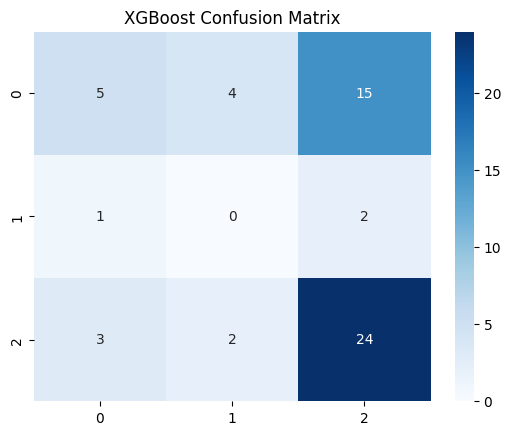

In [ ]:
# ============================
# A) XGBOOST
# ============================
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42
)

model_xgb.fit(X_train_scaled, y_train)
pred_xgb = model_xgb.predict(X_test_scaled)

print("\n===== A) XGBOOST =====")
print("Accuracy:", accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))

cm = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2579
[LightGBM] [Info] Number of data points in the train set: 304, number of used features: 31
[LightGBM] [Info] Start training from score -1.251120
[LightGBM] [Info] Start training from score -1.121908
[LightGBM] [Info] Start training from score -0.946343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



===== B) LIGHTGBM =====
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.75      0.12      0.21        24
           1       0.00      0.00      0.00         3
           2       0.53      0.86      0.66        29

    accuracy                           0.50        56
   macro avg       0.43      0.33      0.29        56
weighted avg       0.60      0.50      0.43        56



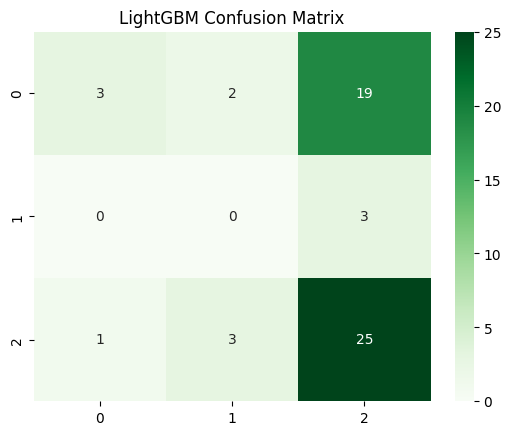

In [ ]:
# ============================
# B) LIGHTGBM
# ============================
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.009,
    max_depth=-1,
    objective="multiclass",
    num_class=3,
    random_state=42
)

model_lgb.fit(X_train_scaled, y_train)
pred_lgb = model_lgb.predict(X_test_scaled)

print("\n===== B) LIGHTGBM =====")
print("Accuracy:", accuracy_score(y_test, pred_lgb))
print(classification_report(y_test, pred_lgb))

cm = confusion_matrix(y_test, pred_lgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("LightGBM Confusion Matrix")
plt.show()


===== C) RANDOM FOREST =====
Accuracy: 0.48214285714285715
              precision    recall  f1-score   support

           0       0.60      0.12      0.21        24
           1       0.11      0.33      0.17         3
           2       0.55      0.79      0.65        29

    accuracy                           0.48        56
   macro avg       0.42      0.42      0.34        56
weighted avg       0.55      0.48      0.43        56



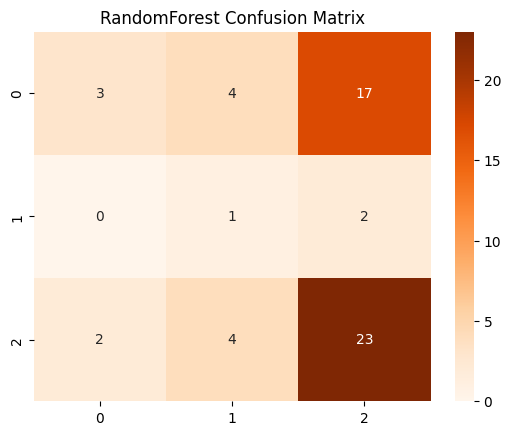

In [ ]:
# ============================
# C) RANDOM FOREST
# ============================
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

model_rf.fit(X_train_scaled, y_train)
pred_rf = model_rf.predict(X_test_scaled)

print("\n===== C) RANDOM FOREST =====")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("RandomForest Confusion Matrix")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



===== D) LOGISTIC REGRESSION =====
Accuracy: 0.5178571428571429
              precision    recall  f1-score   support

           0       0.48      0.92      0.63        24
           1       0.50      0.33      0.40         3
           2       0.75      0.21      0.32        29

    accuracy                           0.52        56
   macro avg       0.58      0.49      0.45        56
weighted avg       0.62      0.52      0.46        56



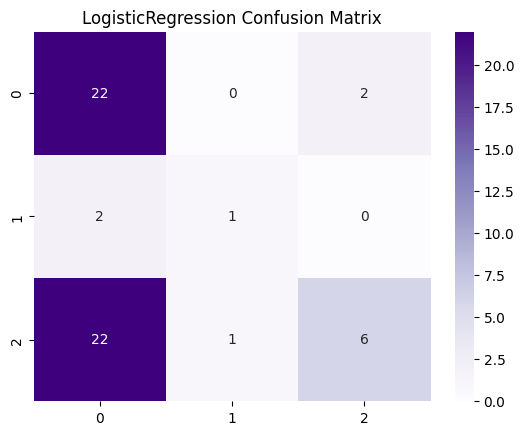

In [ ]:
# ============================
# D) LOGISTIC REGRESSION
# ============================
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(
    max_iter=500,
    multi_class="multinomial"
)

model_lr.fit(X_train_scaled, y_train)
pred_lr = model_lr.predict(X_test_scaled)

print("\n===== D) LOGISTIC REGRESSION =====")
print("Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

cm = confusion_matrix(y_test, pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("LogisticRegression Confusion Matrix")
plt.show()

# Report

# Bài toán dự báo hướng biến động cổ phiếu (Price + News)

---

## 1. Mục tiêu bài toán

Dự đoán **hướng biến động của giá cổ phiếu trong ngày kế tiếp (T+1)** theo 3 lớp:

* **Up (1)**: ( r_{t+1} > +0.5% )
* **Down (-1)**: ( r_{t+1} < -0.5% )
* **Neutral (0)**: ( |r_{t+1}| \le 0.5% )

Trong đó:


    r_{t+1} = \frac{close_{t+1} - close_t}{close_t}


Khi train multi-class, ta mã hoá:

* Down → **0**
* Neutral → **1**
* Up → **2**

---

## 2. Nguồn dữ liệu

### 2.1. Bảng `stock_prices`

Mỗi dòng: **1 ticker – 1 ngày giao dịch**

Các cột sử dụng:

* `ticker`: mã cổ phiếu
* `date_only`: ngày giao dịch (đã chuẩn hoá từ `date`)
* `open`, `high`, `low`, `close`: giá OHLC
* `volume`: khối lượng
* `daily_return`: % thay đổi trong ngày
* `avg_price`: giá trung bình trong ngày
* `volatility`: độ biến động nội ngày (đã được tính trước)
* `turnover`: giá trị giao dịch
* `gap`: chênh lệch giữa giá mở cửa và giá đóng cửa hôm trước
* `range_ratio`: ((high - low) / close)

Các cột **không sử dụng**: `asset_type`, `price_currency`, `daily_change`, `ingested_at`, ...

---

### 2.2. Bảng `news`

Mỗi dòng: **1 bản tin liên quan đến 1 symbol (ticker)**

Các cột sử dụng:

* `symbol` → map sang `ticker`
* `published_at` → chuẩn hoá thành `date_only` (UTC → date)
* `industry`
* `match_score`: mức độ liên quan giữa tin và mã (chuẩn hoá về [0,1])
* `sentiment_score`: điểm cảm xúc (âm/dương/mạnh)
* `impact_index`: mức độ ảnh hưởng của tin (đã xử lý outlier nhẹ)
* `weighted_sentiment`: sentiment có trọng số

Các cột mô tả (`title`, `description`, `url`, `image_url`, `source`, ...) chỉ dùng cho phân tích thủ công, **không đưa vào feature**.

---

## 3. Xử lý dữ liệu tin tức (news)

### 3.1. Chuẩn hoá cơ bản

* Parse thời gian: `published_at → datetime (UTC)`
* Tạo `date_only = published_at.dt.date`
* Chuẩn hoá:

  * `match_score` → ép về numeric và **clip [0,1]**
  * `impact_index` → ép về numeric, xử lý outlier nếu cần (winsorize p1–p99)

### 3.2. Gộp tin tức theo ngày

Group theo `(symbol, date_only)` để tạo 1 dòng/news-feature cho mỗi ticker/ngày:

* `news_count`: số lượng tin trong ngày
* `sent_mean`: trung bình `sentiment_score`
* `sent_max`, `sent_min`: sentiment lớn nhất / nhỏ nhất trong ngày
* `sent_range = sent_max - sent_min`: độ trải cảm xúc
* `weighted_sent_mean`, `weighted_sent_max`: sentiment có trọng số
* `impact_mean`, `impact_max`: độ ảnh hưởng trung bình / lớn nhất
* `match_mean`, `match_max`: mức độ match
* `sent_sign_conflict`: 1 nếu cùng ngày có cả tin dương và âm, ngược lại 0

### 3.3. Xử lý tin cuối tuần

* Tin rơi vào **thứ 7 (Sat)** → dời sang **thứ 2 tuần sau**
* Tin rơi vào **Chủ Nhật (Sun)** → dời sang **thứ 2 tuần sau**

Tạo cột `trade_date` rồi gộp theo `(symbol, trade_date)`, sau đó rename `trade_date → date_only` để đồng bộ với bảng giá.

### 3.4. Fill dữ liệu thiếu

* Join với giá bằng `LEFT JOIN` trên `(ticker, date_only)`
* Ngày **không có news** → các cột news = `NaN`
* Chiến lược fill:

  * Forward-fill theo `ticker` cho các cột news numeric: tin ngày hôm trước tiếp tục ảnh hưởng ngày hôm sau
  * Nếu cả chuỗi 1 ticker không có news → fill 0 (tín hiệu trung tính)
  * `news_count` không ffill, chỉ fill `NaN → 0`

---

## 4. Tạo target (nhãn dự báo)

### 4.1. Next-day return

* Sort theo `ticker`, `date_only`
* Tạo:

```python
close_next = groupby(ticker)[close].shift(-1)
ret_next = (close_next - close) / close
```

### 4.2. Gán nhãn 3 lớp

```python
if ret_next > +0.005 → target = 1   # Up
elif ret_next < -0.005 → target = -1  # Down
else → target = 0  # Neutral
```

Sau đó mã hoá lại để tiện cho model multi-class:

```python
map: -1 → 0, 0 → 1, 1 → 2  → target_cls
```

* Dòng cuối cùng mỗi ticker (không có `close_next`) → bị drop.

---

## 5. Feature engineering

### 5.1. Price-based features (ngắn hạn)

Từ giá và biến đã có:

* `open`, `high`, `low`, `close`
* `volume`
* `daily_return`
* `avg_price`
* `volatility`
* `turnover`
* `gap`
* `range_ratio`

Thêm các đặc trưng động:

* `ret_1d`: (\text{pct_change}(1)) của `close` theo từng `ticker`
* `ret_3d`: (\text{pct_change}(3)) của `close` theo từng `ticker`

> **Lý do rút gọn**: dataset ngắn (~375 dòng), nên bỏ các feature cần nhiều ngày lịch sử như MA20, ATR14, RSI14 để tránh mất nhiều dòng (NaN ở đầu chuỗi).

---

### 5.2. News-based features

Từ bảng đã gộp theo ngày `news_daily` (sau join và ffill):

Feature gốc theo ngày:

* `news_count`: số tin trong ngày
* `sent_mean`, `sent_max`, `sent_min`
* `sent_range`
* `sent_sign_conflict`
* `weighted_sent_mean`, `weighted_sent_max`
* `impact_mean`, `impact_max`
* `match_mean`, `match_max`

Feature rolling ngắn hạn:

* `sent_mean_3`: trung bình `sent_mean` trong 3 ngày gần nhất (per ticker)
* `impact_mean_3`: trung bình `impact_mean` 3 ngày
* `news_count_3`: tổng số tin 3 ngày
* `sent_delta_1`: chênh lệch `sent_mean` so với ngày hôm trước

> **Ý nghĩa**: mô tả dư âm và động lực của tin tức quanh ngày T, không chỉ riêng T.

---

### 5.3. Time-based features

Trực tiếp từ `date_only` (không dùng raw datetime làm feature):

* `weekday`: thứ trong tuần (0 = Monday, ..., 4 = Friday)
* `month`: tháng (1–12)
* `is_month_start`: 1 nếu ngày đầu tháng
* `is_month_end`: 1 nếu ngày cuối tháng

> Dùng để model học các pattern theo lịch (ví dụ: đầu tháng, cuối tháng, ngày trong tuần).

---

## 6. Chuẩn hoá & tách tập train/test

### 6.1. Chọn feature & loại bỏ cột không dùng khi train

Cột **không dùng** làm feature:

* `ticker`: ID, chỉ dùng để group, không đưa vào model
* `date_only`: chỉ dùng để sort/split theo thời gian
* `close_next`, `ret_next`: dùng để tạo target
* `target`, `target_cls`: label

Danh sách feature = tất cả các cột còn lại (price + news + time-based).

### 6.2. Time-series split

* Sort toàn bộ dataset theo `date_only`
* Tách 80% đầu làm train, 20% cuối làm test:

```python
df = df.sort_values("date_only")
split_idx = int(len(df) * 0.8)

X = df[feature_cols]
y = df["target_cls"]

X_train = X.iloc[:split_idx]
y_train = y.iloc[:split_idx]
X_test  = X.iloc[split_idx:]
y_test  = y.iloc[split_idx:]
```

### 6.3. Chuẩn hoá numeric (StandardScaler)

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
```

> Fit scaler **chỉ trên train**, sau đó apply cho test để tránh data leakage.

---

## 7. Mô hình hoá (modeling)

Dùng bài toán **multi-class classification (3 lớp)** với các model:

1. **XGBoostClassifier**
2. **LGBMClassifier (LightGBM)**
3. **RandomForestClassifier**
4. **LogisticRegression (multinomial)**

Đánh giá:

* `accuracy_score`
* `classification_report` (precision, recall, f1-score cho từng lớp)
* `confusion_matrix` (ma trận nhầm lẫn)

> Trong thực tế, LightGBM / XGBoost thường cho performance tốt nhất trên dữ liệu tabular kiểu này.

---

## 8. Tóm tắt kiến trúc bài toán

* **Input**: dữ liệu giá cổ phiếu theo ngày + tin tức đã tính sentiment và impact, được align theo ticker và ngày giao dịch.
* **Feature**:

  * Price-based (ngày hiện tại + momentum ngắn 1–3 ngày)
  * News-based (sentiment, impact, match, rolling 3 ngày)
  * Time-based (weekday, month, head/tail of month)
* **Target**: nhãn 3 lớp Up / Down / Neutral dựa trên (ret_{t+1}).
* **Split**: theo thời gian (80% đầu train, 20% cuối test).
* **Model**: nhiều classifier (XGBoost, LightGBM, RF, Logistic) để so sánh.

Mục tiêu cuối cùng: xây dựng một pipeline ML có thể **học được mối quan hệ giữa giá, tin tức và thời gian** để dự đoán hướng biến động giá ngày tiếp theo cho từng cổ phiếu.
